<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/logistic_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [14]:
data= pd.read_csv("/content/bank_data.csv")


In [15]:
data

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,47,0,1506,1,0,92,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,33,0,1,0,0,198,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60856,51,0,825,0,0,977,3,-1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0
60857,71,0,1729,0,0,456,2,-1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0
60858,72,0,5715,0,0,1127,5,184,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0
60859,57,0,668,0,0,508,4,-1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [16]:
data.shape

(60861, 32)

In [17]:
data = data.dropna()
data.shape

(60859, 32)

In [20]:
X = data.iloc[:,0:30]
Y = data.iloc[:,31]

In [21]:
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [22]:
y_pred = classifier.predict(X)

In [23]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [24]:
y_pred_df

,actual,predicted_prob
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
60856,1.0,1.0
60857,1.0,0.0
60858,1.0,1.0
60859,0.0,0.0


In [ ]:
#confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[50267  1505]
 [ 6828  2259]]


In [26]:
((381+395)/(50267+2259+1505+6828))*100

1.275078460046994

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     51772
         1.0       0.60      0.25      0.35      9087

    accuracy                           0.86     60859
   macro avg       0.74      0.61      0.64     60859
weighted avg       0.84      0.86      0.84     60859



In [ ]:
#ROC curve

Text(0, 0.5, 'True Positive Rate')

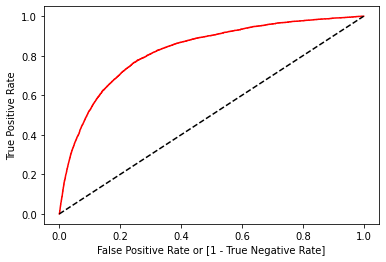

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [29]:
auc

0.6097635646118529

In [ ]:
#60% client has subscribed a term deposite and 40% not 